In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from os import walk 
from os.path import join

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score, confusion_matrix


In [55]:
ham = '/home/fajrin/ML_29/Classifier/example1/easy_ham_1'
spam = '/home/fajrin/ML_29/Classifier/example1/spam_1'
example='/home/fajrin/ML_29/Classifier/example1/easy_ham_1/00001.7c53336b37003a9286aba55d2945844c'

In [56]:
def generator (path):
    for root ,dirnames , filenames in walk(path):
        for file_name in filenames:
            filepath = join(root ,file_name)
            filepath_ = open(filepath , encoding='latin-1')

            body = False
            lines =[]
        
            for line in filepath_ :
                if body:
                    lines.append(line)
                elif line =='\n':
                    body=True
            filepath_.close()
        
            emailbody = '\n'.join(lines)
            yield file_name , emailbody

In [57]:
def df_generator (path ,clas):
    row=[]
    name=[]
    for filenames , emailbody in generator(path):
        name.append(filenames)
        row.append({'message': emailbody ,'category':clas})
    return pd.DataFrame(data = row , index=name)

In [58]:
spam_df = df_generator(spam ,1 )
ham_df = df_generator(ham ,0)

In [59]:
df= spam_df.append(ham_df)

In [60]:
# checking the missing null
df.info()
df.message.isnull().any()
(df.message.str.len()== 0).any()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 00477.24ef7a042f97482f884387c75249380c to 00078.2ea8ca29bc2ed373a6c8270b488def60
Data columns (total 2 columns):
message     3002 non-null object
category    3002 non-null int64
dtypes: int64(1), object(1)
memory usage: 70.4+ KB


True

In [61]:
df[df.message.str.len()==0].index

Index(['cmds', 'cmds'], dtype='object')

In [62]:
df.loc['cmds']

,message,category
cmds,,1
cmds,,0


In [63]:
df.drop('cmds' ,inplace=True)

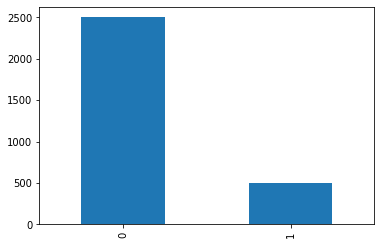

In [64]:
df['category'].value_counts().plot(kind='bar')

In [65]:
labels =['spam_email' ,'ham_email']
amount_spam = df.category.value_counts()[1]
amount_ham = df.category.value_counts()[0]
size=[amount_spam , amount_ham]

([<matplotlib.patches.Wedge at 0x7f4953752bd0>,
 [Text(0.9526279355804298, 0.5500000148652441, 'spam_email'),
  Text(-1.0392305032666775, -0.5999999675667395, 'ham_email')],
 [Text(0.5196152375893253, 0.30000000810831495, '16.7%'),
  Text(-0.6062177935722285, -0.34999998108059793, '83.3%')])

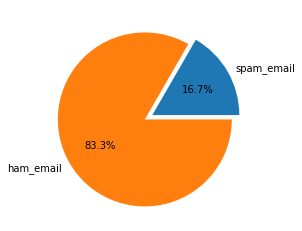

In [66]:
plt.pie(size, labels=labels , autopct = '%1.1f%%' ,explode =[0 ,0.1])

In [69]:
# vectorizer 
vectorizer = CountVectorizer()
all_feature = vectorizer.fit_transform(df['message'])

In [73]:
# split
X_train ,X_test , y_train , y_test = train_test_split(all_feature , df['category'] 
                                                      ,test_size=0.33 ,random_state =42)

In [74]:
model = MultinomialNB()
model.fit(X_train ,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
model.score(X_train ,y_train)

0.9641791044776119

In [77]:
model.score(X_test , y_test)

0.9484848484848485

In [86]:
nr_correct = (y_test == model.predict(X_test)).sum()
nr_correct

939

In [91]:
example = ['get viagra for free now!', 
          'need a mortgage? Reply to arrange a call with a specialist and get a quote', 
          'Could you please help me with the project for tomorrow?', 
          'Hello Jonathan, how about a game of golf tomorrow?', 
          'Ski jumping is a winter sport in which competitors aim to achieve the longest jump after descending from a specially designed ramp on their skis. Along with jump length, competitor\'s style and other factors affect the final score. Ski jumping was first contested in Norway in the late 19th century, and later spread through Europe and North America in the early 20th century. Along with cross-country skiing, it constitutes the traditional group of Nordic skiing disciplines.'
          ]

example1 =['hi please suscribe this newspape' , 'I hate you Khumairah']

In [92]:
example_ = vectorizer.transform(example1)
print(model.predict(example_))

[0 0]


In [93]:
confusion_matrix(y_test , model.predict(X_test))

array([[815,   3],
       [ 48, 124]])

In [94]:
confusion_matrix(y_train , model.predict(X_train))

array([[1678,    4],
       [  68,  260]])

In [ ]:
n = input()
if n % 2 == 0:
    print(n , 'is even')
else :
    print('is odd')